# Achraf Safsafi
# DSC 630
# Final Project

In [1]:
# Load the data 
import yfinance as yf
tkr = yf.Ticker('AAPL')
hist = tkr.history(period='Max')
df = hist.iloc[:,0:5]
df = df.reset_index() 
df

,Date,Open,High,Low,Close,Volume
0,1980-12-12,0.10,0.10,0.10,0.10,469033600
1,1980-12-15,0.10,0.10,0.10,0.10,175884800
2,1980-12-16,0.09,0.09,0.09,0.09,105728000
3,1980-12-17,0.09,0.09,0.09,0.09,86441600
4,1980-12-18,0.09,0.09,0.09,0.09,73449600
...,...,...,...,...,...,...
10067,2020-11-16,118.92,120.99,118.15,120.30,91183000
10068,2020-11-17,119.55,120.67,118.96,119.39,74271000
10069,2020-11-18,118.61,119.82,118.00,118.03,76322100
10070,2020-11-19,117.59,119.06,116.81,118.64,74113000


Text(0, 0.5, 'Close Price US($)')

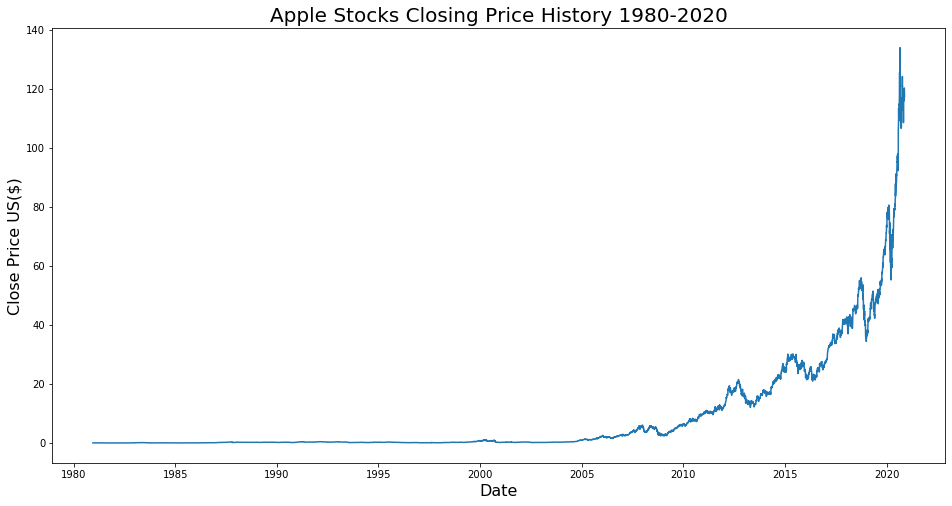

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.title('Apple Stocks Closing Price History 1980-2020',fontsize=20)
plt.plot(df['Date'],df['Close'])
plt.xlabel('Date',fontsize=16)
plt.ylabel('Close Price US($)',fontsize=16)

In [3]:
from stockstats import StockDataFrame as Sdf
#convert  pandas dataframe to  stockstats dataframe
stock = Sdf.retype(df)
## Add predictors
# Moving Average Convergence Divergence (MACD)
df['macd']=stock['macd']
df.sort_values(by=['date'], inplace=True, ascending=False)
del df['close_12_ema']
del df['close_26_ema']
del df['macd_9_ema']
del df['macds']
del df['macdh']
# 
df['rsi_12']=stock['rsi_12']
# Williams %R (WR)
df['wr_12']=stock['wr_12']
#2 days simple moving average on open price
df['open_2_sma'] = stock['open_2_sma']
df


NOTE: Behavior of MACDH calculation has changed as of July 2017 - it is now 1/2 of previous calculated values
C:\Users\asafs\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,open,high,low,close,volume,macd,rsi_12,wr_12,open_2_sma
date,,,,,,,,,
2020-11-20,118.64,118.77,117.29,117.34,73391400,0.924274,50.868030,59.160305,118.115
2020-11-19,117.59,119.06,116.81,118.64,74113000,1.044232,54.374891,34.079349,118.100
2020-11-18,118.61,119.82,118.00,118.03,76322100,1.049790,52.980616,29.442379,119.080
2020-11-17,119.55,120.67,118.96,119.39,74271000,1.103723,56.509925,17.508418,119.235
2020-11-16,118.92,120.99,118.15,120.30,91183000,1.018034,58.917218,11.380471,119.180
...,...,...,...,...,...,...,...,...,...
1980-12-18,0.09,0.09,0.09,0.09,73449600,-0.000507,0.000000,100.000000,0.090
1980-12-17,0.09,0.09,0.09,0.09,86441600,-0.000444,0.000000,100.000000,0.090
1980-12-16,0.09,0.09,0.09,0.09,105728000,-0.000310,0.000000,100.000000,0.095


In [4]:
#Drop rows with NaN values
import numpy as np
df.replace([np.inf, -np.inf], np.nan)
df.dropna()

,open,high,low,close,volume,macd,rsi_12,wr_12,open_2_sma
date,,,,,,,,,
2020-11-20,118.64,118.77,117.29,117.34,73391400,0.924274,50.868030,59.160305,118.115
2020-11-19,117.59,119.06,116.81,118.64,74113000,1.044232,54.374891,34.079349,118.100
2020-11-18,118.61,119.82,118.00,118.03,76322100,1.049790,52.980616,29.442379,119.080
2020-11-17,119.55,120.67,118.96,119.39,74271000,1.103723,56.509925,17.508418,119.235
2020-11-16,118.92,120.99,118.15,120.30,91183000,1.018034,58.917218,11.380471,119.180
...,...,...,...,...,...,...,...,...,...
1980-12-22,0.10,0.10,0.10,0.10,37363200,0.000150,56.489049,0.000000,0.100
1980-12-19,0.10,0.10,0.10,0.10,48630400,-0.000108,56.489049,0.000000,0.095
1980-12-18,0.09,0.09,0.09,0.09,73449600,-0.000507,0.000000,100.000000,0.090


In [5]:
df.isnull().any()

open          False
high          False
low           False
close         False
volume        False
macd          False
rsi_12         True
wr_12          True
open_2_sma    False
dtype: bool

In [6]:
#Drop rows with NaN values
df['rsi_12'].dropna()
df.describe()
df = df.dropna(subset=['rsi_12'])
df = df.dropna(subset=['wr_12'])
df = df.dropna(subset=['open_2_sma'])
df.isnull().any()

open          False
high          False
low           False
close         False
volume        False
macd          False
rsi_12        False
wr_12         False
open_2_sma    False
dtype: bool

In [7]:
from sklearn import preprocessing
import pandas as pd
#Normalization
names = df.columns
min_max_scaler = preprocessing.MinMaxScaler()
scaled_df = min_max_scaler.fit_transform(df)
df = pd.DataFrame(scaled_df, columns=names)
df

,open,high,low,close,volume,macd,rsi_12,wr_12,open_2_sma
0,0.863739,0.862237,0.900054,0.875961,0.009704,0.454541,0.519091,0.591603,0.875278
1,0.856092,0.864343,0.896369,0.885669,0.009801,0.464442,0.554877,0.340793,0.875167
2,0.863521,0.869862,0.905504,0.881114,0.010098,0.464901,0.540649,0.294424,0.882431
3,0.870366,0.876035,0.912873,0.891270,0.009822,0.469352,0.576664,0.175084,0.883580
4,0.865778,0.878359,0.906655,0.898066,0.012101,0.462280,0.601230,0.113805,0.883173
...,...,...,...,...,...,...,...,...,...
9953,0.000437,0.000436,0.000461,0.000448,0.004848,0.378265,0.576451,0.000000,0.000445
9954,0.000437,0.000436,0.000461,0.000448,0.006367,0.378244,0.576451,0.000000,0.000408
9955,0.000364,0.000363,0.000384,0.000373,0.009711,0.378211,0.000000,1.000000,0.000371
9956,0.000364,0.000363,0.000384,0.000373,0.011462,0.378216,0.000000,1.000000,0.000371


In [8]:
df['Up_Or_Down'] = np.where (df['close'].shift(-1) > df['close'],1,0)
df

,open,high,low,close,volume,macd,rsi_12,wr_12,open_2_sma,Up_Or_Down
0,0.863739,0.862237,0.900054,0.875961,0.009704,0.454541,0.519091,0.591603,0.875278,1
1,0.856092,0.864343,0.896369,0.885669,0.009801,0.464442,0.554877,0.340793,0.875167,0
2,0.863521,0.869862,0.905504,0.881114,0.010098,0.464901,0.540649,0.294424,0.882431,1
3,0.870366,0.876035,0.912873,0.891270,0.009822,0.469352,0.576664,0.175084,0.883580,1
4,0.865778,0.878359,0.906655,0.898066,0.012101,0.462280,0.601230,0.113805,0.883173,0
...,...,...,...,...,...,...,...,...,...,...
9953,0.000437,0.000436,0.000461,0.000448,0.004848,0.378265,0.576451,0.000000,0.000445,0
9954,0.000437,0.000436,0.000461,0.000448,0.006367,0.378244,0.576451,0.000000,0.000408,0
9955,0.000364,0.000363,0.000384,0.000373,0.009711,0.378211,0.000000,1.000000,0.000371,0
9956,0.000364,0.000363,0.000384,0.000373,0.011462,0.378216,0.000000,1.000000,0.000371,0


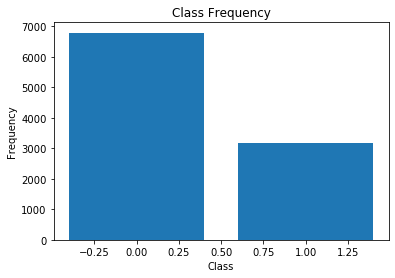

In [9]:
import matplotlib.pyplot as plt
classes = df['Up_Or_Down'].values
unique,counts = np.unique(classes, return_counts=True)

plt.bar(unique,counts)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [10]:
#split dataset in features and target variable
# Features
X = df.drop('Up_Or_Down', axis=1)
# Target variable
y = df.Up_Or_Down

Feature 0: 127.262905
Feature 1: 123.675036
Feature 2: 122.147464
Feature 3: 118.134796
Feature 4: 160.088998
Feature 5: 0.085132
Feature 6: 351.877294
Feature 7: 767.256274
Feature 8: 129.286908


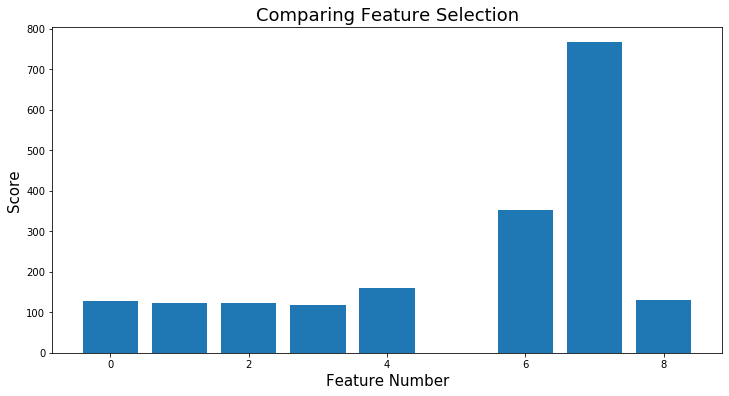

In [11]:
# feature selection
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot


def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs


# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
plt.figure(figsize=(12,6))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)

# set labels

plt.xlabel("Feature Number", size=15)
plt.ylabel("Score", size=15)
plt.title("Comparing Feature Selection", size=18)
pyplot.show()

## Logistic Regression

In [12]:
##Logistic Regression
## Model Generation
from sklearn.linear_model import LogisticRegression
# instantiate the model
model1 = LogisticRegression()
# fit the model with data
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)
#Testing accuracy
from sklearn import metrics
print('Testing accuracy =', metrics.accuracy_score(y_test, y_pred1))
# stratified 5-fold cross-validation
from sklearn.model_selection import cross_val_score,StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True) # KFold with 'stratify' option
cross_val1 = cross_val_score(model1, X, y, scoring='accuracy', cv=cv)
print('cv accuracy =',cross_val1.mean())
# cv AUC
cross_val11 = cross_val_score(model1, X, y, scoring='roc_auc', cv=cv)
cross_val11
print('cv AUC =',cross_val11.mean())


Testing accuracy = 0.715850319440219
cv accuracy = 0.7274553765035027
cv AUC = 0.7424004213668931


## Gaussian Naive Bayes

In [13]:
## Model Generation
from sklearn.naive_bayes import GaussianNB
# instantiate the model
model2 = GaussianNB()
# fit the model with data
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
#Testing accuracy
print('Testing accuracy =', metrics.accuracy_score(y_test, y_pred2))
# stratified 5-fold cross-validation
cross_val2 = cross_val_score(model2, X, y, scoring='accuracy', cv=cv)
print('cv accuracy =',cross_val2.mean())
# cv AUC
cross_val22 = cross_val_score(model2, X, y, scoring='roc_auc', cv=cv)
cross_val22
print('cv AUC =',cross_val22.mean())

Testing accuracy = 0.7058107696988135
cv accuracy = 0.693011221178032
cv AUC = 0.7148968191963889


## Support Vector Classifier (SVC) Using RBF Kernel


In [14]:
## Model Generation
#Import svm model
from sklearn.svm import SVC
# instantiate the model
model3 = SVC(kernel="rbf")
# fit the model with data
model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)
#Testing accuracy
print('Testing accuracy =', metrics.accuracy_score(y_test, y_pred3))
# stratified 5-fold cross-validation
cross_val3 = cross_val_score(model3, X, y, scoring='accuracy', cv=cv)
print('cv accuracy =',cross_val3.mean())
# cv AUC
cross_val33 = cross_val_score(model3, X, y, scoring='roc_auc', cv=cv)
cross_val33
print('cv AUC =',cross_val33.mean())

Testing accuracy = 0.7380590203833283
cv accuracy = 0.7345867649402229
cv AUC = 0.7887197681754334


## Decision Tree


In [15]:
## Model Generation
#Import svm model
from sklearn.tree import DecisionTreeClassifier
# instantiate the model
model4 = DecisionTreeClassifier()
# fit the model with data
model4.fit(X_train,y_train)
y_pred4=model4.predict(X_test)
#Testing accuracy
print('Testing accuracy =', metrics.accuracy_score(y_test, y_pred4))
# stratified 5-fold cross-validation
cross_val4 = cross_val_score(model4, X, y, scoring='accuracy', cv=cv)
print('cv accuracy =',cross_val4.mean())
# cv AUC
cross_val44 = cross_val_score(model4, X, y, scoring='roc_auc', cv=cv)
cross_val44
print('cv AUC =',cross_val44.mean())

Testing accuracy = 0.7258898691816246
cv accuracy = 0.7190191706050723
cv AUC = 0.6778068655771385


## Random Forest

In [16]:
## Model Generation
#Import svm model
from sklearn.ensemble import RandomForestClassifier
# instantiate the model
model5 = RandomForestClassifier()
# fit the model with data
model5.fit(X_train,y_train)
y_pred5=model5.predict(X_test)
#Testing accuracy
print('Testing accuracy =', metrics.accuracy_score(y_test, y_pred5))
# stratified 5-fold cross-validation
cross_val5 = cross_val_score(model5, X, y, scoring='accuracy', cv=cv)
print('cv accuracy =',cross_val5.mean())
# cv AUC
cross_val55 = cross_val_score(model5, X, y, scoring='roc_auc', cv=cv)
cross_val55
print('cv AUC =',cross_val55.mean())

Testing accuracy = 0.7669607544873746
cv accuracy = 0.7769619411851323
cv AUC = 0.8533206403895374


## XGBoost

In [17]:
## Model Generation
#Import svm model
from sklearn.ensemble import RandomForestClassifier
# instantiate the model
model6 = RandomForestClassifier()
# fit the model with data
model6.fit(X_train,y_train)
y_pred6=model6.predict(X_test)
#Testing accuracy
print('Testing accuracy =', metrics.accuracy_score(y_test, y_pred6))
# stratified 5-fold cross-validation
cross_val6 = cross_val_score(model6, X, y, scoring='accuracy', cv=cv)
print('cv accuracy =',cross_val6.mean())
# cv AUC
cross_val66 = cross_val_score(model6, X, y, scoring='roc_auc', cv=cv)
cross_val66
print('cv AUC =',cross_val66.mean())

Testing accuracy = 0.7690903559476726
cv accuracy = 0.7783687739405638
cv AUC = 0.8538312931233879


In [18]:
#  creating   DataFrame  
import pandas as pd 
  
# intialise data of lists. 
data = {'Classifiers':['Logistic Regression', 'Gaussian Naive Bayes', 'SVC Using RBF Kernel',
                       'Decision Tree','Random Forest','XGBoost'], 
        'Testing Accuracy':[metrics.accuracy_score(y_test, y_pred1), metrics.accuracy_score(y_test, y_pred2),
                             metrics.accuracy_score(y_test, y_pred3), metrics.accuracy_score(y_test, y_pred4),
                            metrics.accuracy_score(y_test, y_pred5),metrics.accuracy_score(y_test, y_pred6)],
       'CV Accuracy':[cross_val1.mean(), cross_val2.mean(), cross_val3.mean(), 
                      cross_val4.mean(),cross_val5.mean(),cross_val6.mean()],
       'CV AUC':[cross_val11.mean(),cross_val22.mean(),cross_val33.mean(),
                 cross_val44.mean(),cross_val55.mean(),cross_val66.mean()]} 
  
# Create DataFrame 
df = pd.DataFrame(data) 
  
# Print the output. 
df 

,Classifiers,Testing Accuracy,CV Accuracy,CV AUC
0,Logistic Regression,0.715850,0.727455,0.742400
1,Gaussian Naive Bayes,0.705811,0.693011,0.714897
2,SVC Using RBF Kernel,0.738059,0.734587,0.788720
3,Decision Tree,0.725890,0.719019,0.677807
4,Random Forest,0.766961,0.776962,0.853321
5,XGBoost,0.769090,0.778369,0.853831


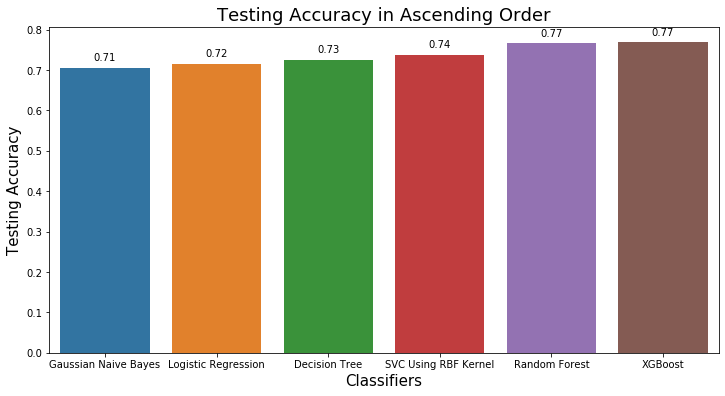

In [19]:
import seaborn as sns
plt.figure(figsize=(12,6))
# make barplot and sort bars
pp =sns.barplot(x='Classifiers',
            y="Testing Accuracy", 
            data=df, 
            order=df.sort_values('Testing Accuracy').Classifiers)
# set labels
plt.xlabel("Classifiers", size=15)
plt.ylabel("Testing Accuracy", size=15)
plt.title("Testing Accuracy in Ascending Order", size=18)

for p in pp.patches:
    pp.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


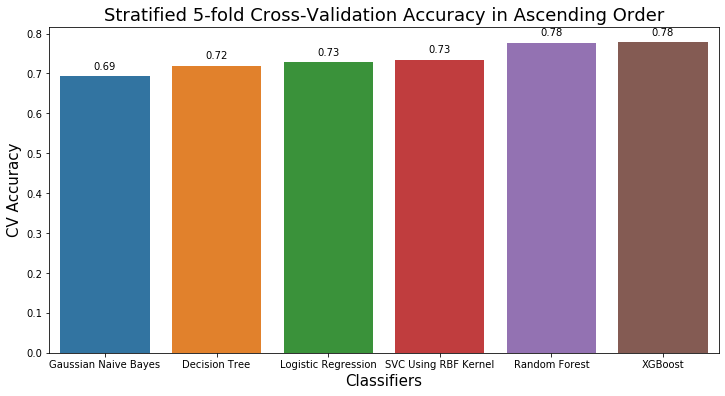

In [20]:
plt.figure(figsize=(12,6))
# make barplot and sort bars
pp = sns.barplot(x='Classifiers',
            y="CV Accuracy", 
            data=df, 
            order=df.sort_values('CV Accuracy').Classifiers)
# set labels
plt.xlabel("Classifiers", size=15)
plt.ylabel("CV Accuracy", size=15)
plt.title("Stratified 5-fold Cross-Validation Accuracy in Ascending Order", size=18)

for p in pp.patches:
    pp.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

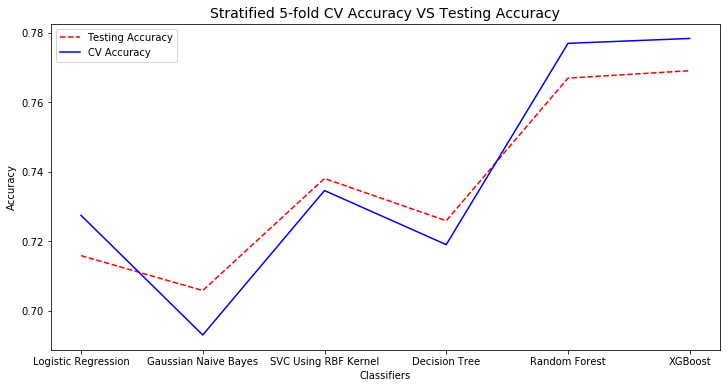

In [21]:
# Visualize 
plt.figure(figsize=(12,6))
plt.plot(df.Classifiers,df['Testing Accuracy'], 'r--')
plt.plot(df.Classifiers,df['CV Accuracy'], 'b-')
plt.legend(['Testing Accuracy', 'CV Accuracy'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title("Stratified 5-fold CV Accuracy VS Testing Accuracy", size=14)
plt.show()

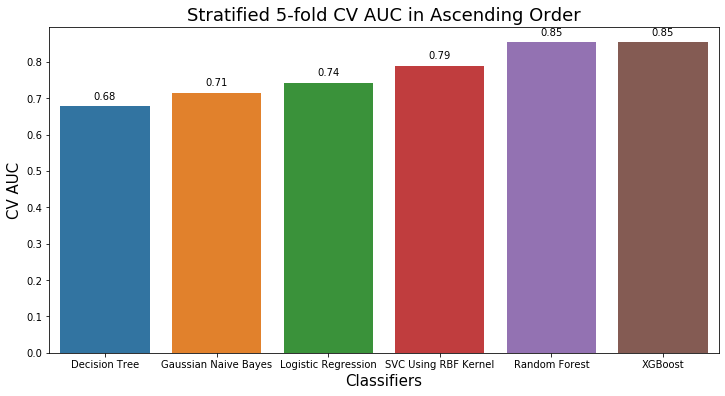

In [22]:
plt.figure(figsize=(12,6))
# make barplot and sort bars
pp =sns.barplot(x='Classifiers',
            y="CV AUC", 
            data=df, 
            order=df.sort_values('CV AUC').Classifiers)
# set labels
plt.xlabel("Classifiers", size=15)
plt.ylabel("CV AUC", size=15)
plt.title("Stratified 5-fold CV AUC in Ascending Order", size=18)


for p in pp.patches:
    pp.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')